In [140]:
import pandas as pd
import nba_api as nba
from nba_api.stats.static import teams
from nba_api.stats.static import players as P
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import shotchartdetail

In [58]:
#get teams
teams = pd.DataFrame(teams.get_teams())
teams.to_csv('data/teams.csv')
teams

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949
1,BOS,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946
2,CLE,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970
3,NOP,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002
4,CHI,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966
5,DAL,Dallas,Dallas Mavericks,1610612742,Mavericks,Texas,1980
6,DEN,Denver,Denver Nuggets,1610612743,Nuggets,Colorado,1976
7,GSW,Golden State,Golden State Warriors,1610612744,Warriors,California,1946
8,HOU,Houston,Houston Rockets,1610612745,Rockets,Texas,1967
9,LAC,Los Angeles,Los Angeles Clippers,1610612746,Clippers,California,1970


In [41]:
#Select all games from 17-18 Season, only columns of interest are game_id, matchup and date
schedule = leaguegamelog.LeagueGameLog(season_all_time='2017-18').get_data_frames()[0][['GAME_ID','GAME_DATE','MATCHUP']]
#Reduce the size of data frame by only keeping the matchup values that contain '@'
#(this will also show home/away teams easily)
schedule = schedule[schedule['MATCHUP'].str.contains('@')]
#This dataframe is now ready, save and move on..
schedule.to_csv('data/schedule.csv')

In [145]:
P.find_players_by_last_name('Valanciunas')

[{'id': 202685,
  'full_name': 'Jonas Valanciunas',
  'first_name': 'Jonas',
  'last_name': 'Valanciunas'}]

In [70]:
schedule

,GAME_ID,GAME_DATE,MATCHUP
1,0021700002,2017-10-17,HOU @ GSW
2,0021700001,2017-10-17,BOS @ CLE
4,0021700011,2017-10-18,MIN @ SAS
6,0021700012,2017-10-18,POR @ PHX
9,0021700007,2017-10-18,MIL @ BOS
11,0021700005,2017-10-18,MIA @ ORL
12,0021700003,2017-10-18,CHA @ DET
15,0021700004,2017-10-18,BKN @ IND
16,0021700010,2017-10-18,DEN @ UTA
18,0021700009,2017-10-18,ATL @ DAL


In [186]:
shots = shotchartdetail.ShotChartDetail(season_nullable='2017-18', team_id=0, player_id=0).get_data_frames()[0]
#shots.columns.values.tolist()
import math

In [187]:
shots['NEW_Y'] = (shots['LOC_Y']) + math.tan(15 * math.pi / 180) * shots['LOC_X']
shots.to_csv('data/shots.csv')

In [92]:
shots[shots['GAME_ID'] == '0021701222'].to_csv('data/test2.csv')

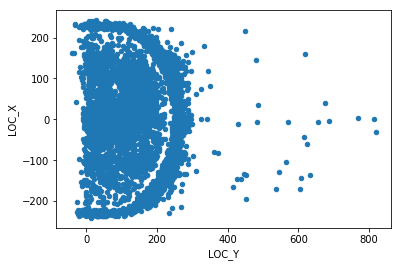

In [184]:
temp = pd.DataFrame(shots[shots['TEAM_ID'] == 1610612744])
temp.plot.scatter('LOC_Y', 'LOC_X')

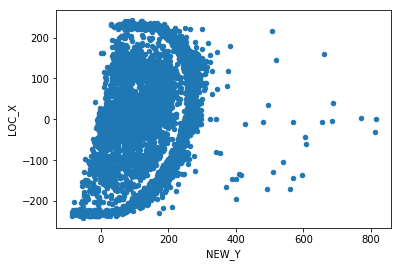

In [185]:
temp.plot.scatter('NEW_Y', 'LOC_X')
temp.to_csv('data/warriors.csv')

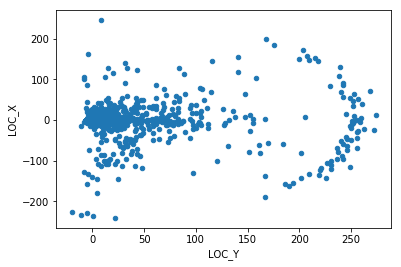

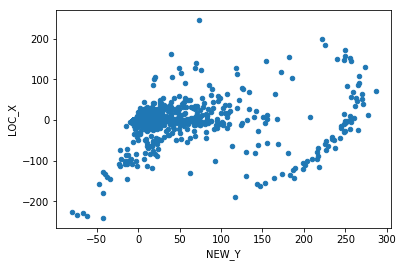

In [175]:
temp2 = pd.DataFrame(shots[shots['PLAYER_ID'] == 202685])
temp2.plot.scatter('LOC_Y', 'LOC_X')
temp2.plot.scatter('NEW_Y', 'LOC_X')
temp2.to_csv('data/valanciunas.csv')

In [170]:
shotchartdetail.ShotChartDetail(context_measure_simple='FGA', season_nullable='2017-18', team_id=0, player_id=202685).get_data_frames()[0]


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700014,16,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,10,26,...,Center(C),Less Than 8 ft.,3,-35,4,1,1,20171019,TOR,CHI
1,Shot Chart Detail,0021700014,20,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,9,52,...,Left Side Center(LC),16-24 ft.,17,-56,170,1,1,20171019,TOR,CHI
2,Shot Chart Detail,0021700014,25,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,9,22,...,Center(C),Less Than 8 ft.,0,0,-6,1,1,20171019,TOR,CHI
3,Shot Chart Detail,0021700014,43,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,7,43,...,Center(C),24+ ft.,26,4,260,1,0,20171019,TOR,CHI
4,Shot Chart Detail,0021700014,96,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,2,13,...,Center(C),Less Than 8 ft.,3,-3,32,1,0,20171019,TOR,CHI
5,Shot Chart Detail,0021700014,98,202685,Jonas Valanciunas,1610612761,Toronto Raptors,1,2,10,...,Center(C),Less Than 8 ft.,1,-3,17,1,0,20171019,TOR,CHI
6,Shot Chart Detail,0021700014,278,202685,Jonas Valanciunas,1610612761,Toronto Raptors,2,2,44,...,Center(C),Less Than 8 ft.,1,3,12,1,1,20171019,TOR,CHI
7,Shot Chart Detail,0021700014,319,202685,Jonas Valanciunas,1610612761,Toronto Raptors,3,11,40,...,Center(C),Less Than 8 ft.,0,-8,-5,1,0,20171019,TOR,CHI
8,Shot Chart Detail,0021700014,326,202685,Jonas Valanciunas,1610612761,Toronto Raptors,3,10,20,...,Center(C),Less Than 8 ft.,4,12,48,1,1,20171019,TOR,CHI
9,Shot Chart Detail,0021700014,348,202685,Jonas Valanciunas,1610612761,Toronto Raptors,3,8,5,...,Center(C),8-16 ft.,14,8,148,1,0,20171019,TOR,CHI
